# Steel Plates Faults (철판 제조 공정 데이터)

- 데이터 셋 : https://www.kaggle.com/mahsateimourikia/faults-nna

- FastCampus의 강의해설을 듣고 진행하였다. (https://www.fastcampus.co.kr/data_online_dl300)

- 철판의 여러 특성을 통해 불량을 예측하고자 하는 데이터 셋
- 제조 공정 데이터로, 불량품 예측하여 원인을 제거하거나 재고를 예측하여 수요에 맞는 생산을 진행하는 방식의 데이터가 주를 이룬다.
- 데이터 모이는 과정이 자동화되어 결측치가 적거나 퀄리티가 좋은 경향을 보인다.
- 머신러닝 대부분의 모델 적용 연습

## 라이브러리 설정 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Faults.NNA', delimiter='\t', header=None)

pd.set_option('display.max_columns', None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


- 컬럼이 숫자로 되어 있는데 정해져 있는 이름값으로 바꿔준다.

In [3]:
a_name = pd.read_csv('Faults27x7_var', delimiter=' ', header=None)
df.columns = a_name[0]

In [4]:
df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1940,1261,1281,87951,87967,103,26,22,11682,101,133,1360,1,0,80,0.1162,0.6781,0.8000,0.0147,0.7692,0.7273,0.0,2.0128,1.3010,1.2041,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,1


In [5]:
print(df.shape)

(1941, 34)


In [7]:
import os
n_cpu = os.cpu_count()
print(n_cpu)
n_thread = n_cpu*2
print(n_thread)

4
8


- 계산량이 많을 수 있어 cpu를 나누어 계산하는 방법이 있다.
- 전부 숫자형 데이터이다.

종속변수 7개 (철판에 어떠한 불량이 생겼는지)

- Pastry
- Z_Scratch
- K_Scatch
- Stains
- Dirtiness
- Bumps
- Other_Faults

설명변수 27개 (철판의 길이, 반짝이는 정도 - 두께 타입 등 다양한 변수)

- X_Minimum
- X_Maximum
- Y_Minimum
- Y_Maximum
- Pixels_Areas
- X_Perimeter
- Y_Perimeter
- Sum_of_Luminosity
- Minimum_of_Luminosity
- Maximum_of_Luminosity
- Length_of_Conveyer
- TypeOfSteel_A300
- TypeOfSteel_A400
- Steel_Plate_Thickness
- Edges_Index
- Empty_Index
- Square_Index
- Outside_X_Index
- Edges_X_Index
- Edges_Y_Index
- Outside_Global_Index
- LogOfAreas
- Log_X_Index
- Log_Y_Index
- Orientation_Index
- Luminosity_Index
- SigmoidOfAreas

## 데이터 전처리 및 EDA-기초통계분석

- 종속변수(철판이상을 나타내는)가 7가지가 있기에 7개를 이어 붙인 리스트를 만들어준다.

In [10]:
conditions = [df['Pastry'].astype(bool),
             df['Z_Scratch'].astype(bool),
             df['K_Scatch'].astype(bool),
             df['Stains'].astype(bool),
             df['Dirtiness'].astype(bool),
             df['Bumps'].astype(bool),
             df['Other_Faults'].astype(bool)]

# 사실 뭐 astype 안쓰고 conditions = list(map(lambda i : i.astype(bool), 'astype안쓴 데이터프레임')) 이렇게도 가능.

In [13]:
print(type(conditions))
print(type(conditions[0]))
print(len(conditions))
print(len(conditions[0]))

<class 'list'>
<class 'pandas.core.series.Series'>
7
1941


In [14]:
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

df['class'] = np.select(conditions, choices)

# np.select 를 이용해 True에 해당하는 값을 출력하는 column을 만들어줌.

In [15]:
df.sample(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
504,41,190,2254407,2254463,4995,232,124,527906,39,127,1402,0,1,40,0.0585,0.4014,0.3758,0.1063,0.6422,0.4516,0.0,3.6985,2.1732,1.7482,-0.6242,-0.1743,1.0000,0,0,1,0,0,0,0,K_Scatch
1363,867,1104,949655,949669,1695,247,106,197365,103,132,1668,0,1,40,0.6763,0.4891,0.0591,0.1421,0.9595,0.1321,0.0,3.2292,2.3747,1.1461,-0.9409,-0.0903,1.0000,0,0,0,0,0,0,1,Other_Faults
1604,1287,1302,3204829,3204845,191,17,16,20590,67,133,1627,0,1,40,0.3995,0.2042,0.9375,0.0092,0.8824,1.0000,1.0,2.2810,1.1761,1.2041,0.0625,-0.1578,0.3977,0,0,0,0,0,0,1,Other_Faults
1566,741,756,614880,614919,392,19,39,40498,77,127,1360,1,0,150,0.8882,0.3299,0.3846,0.0110,0.7895,1.0000,1.0,2.5933,1.1761,1.5911,0.6154,-0.1929,0.8682,0,0,0,0,0,0,1,Other_Faults
1890,1058,1080,751892,751911,133,35,20,17085,112,142,1658,1,0,143,0.6972,0.6818,0.8636,0.0133,0.6286,0.9500,0.0,2.1239,1.3424,1.2787,-0.1364,0.0036,0.6839,0,0,0,0,0,0,1,Other_Faults
1252,1094,1124,12806495,12806520,571,37,25,58587,63,127,1362,0,1,40,0.3495,0.2387,0.8333,0.0220,0.8108,1.0000,0.0,2.7566,1.4771,1.3979,-0.1667,-0.1984,0.9519,0,0,0,0,0,1,0,Bumps
273,322,357,1747625,1747660,314,84,50,38597,110,140,1356,1,0,70,0.4749,0.7437,1.0000,0.0258,0.4167,0.7000,0.5,2.4969,1.5441,1.5441,0.0000,-0.0397,0.9979,0,1,0,0,0,0,0,Z_Scratch
373,919,930,561832,561842,88,11,10,14538,134,183,1387,0,1,40,0.6590,0.2000,0.9091,0.0079,1.0000,1.0000,0.0,1.9445,1.0414,1.0000,-0.0909,0.2907,0.2173,0,0,1,0,0,0,0,K_Scatch
625,41,214,1775604,1775675,6686,273,132,687345,36,124,1356,0,1,40,0.0605,0.4557,0.4104,0.1276,0.6337,0.5379,0.0,3.8252,2.2380,1.8513,-0.5896,-0.1969,1.0000,0,0,1,0,0,0,0,K_Scatch
1671,705,727,5071808,5071831,282,38,27,30746,77,126,1356,1,0,200,0.9277,0.4427,0.9565,0.0162,0.5789,0.8518,1.0,2.4502,1.3424,1.3617,0.0435,-0.1482,0.7955,0,0,0,0,0,0,1,Other_Faults


In [16]:
df.isnull().sum()

0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
class                    0
dtype: int64

In [17]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df['class'].value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: class, dtype: int64

#### 산점도 통해서 각 변수간의 관계 파악

In [19]:
color_code = {'Pastry' : 'Red', 'Z_Scratch' : 'Blue', 'K_Scatch' : 'Green', 'Stains' : 'Black', 'Dirtiness' : 'Pink', 'Bumps' : 'Brown', 'Other_Faults' : 'Gold'}
color_list = [color_code.get(i) for i in df.loc[:,'class']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C49A32E348>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

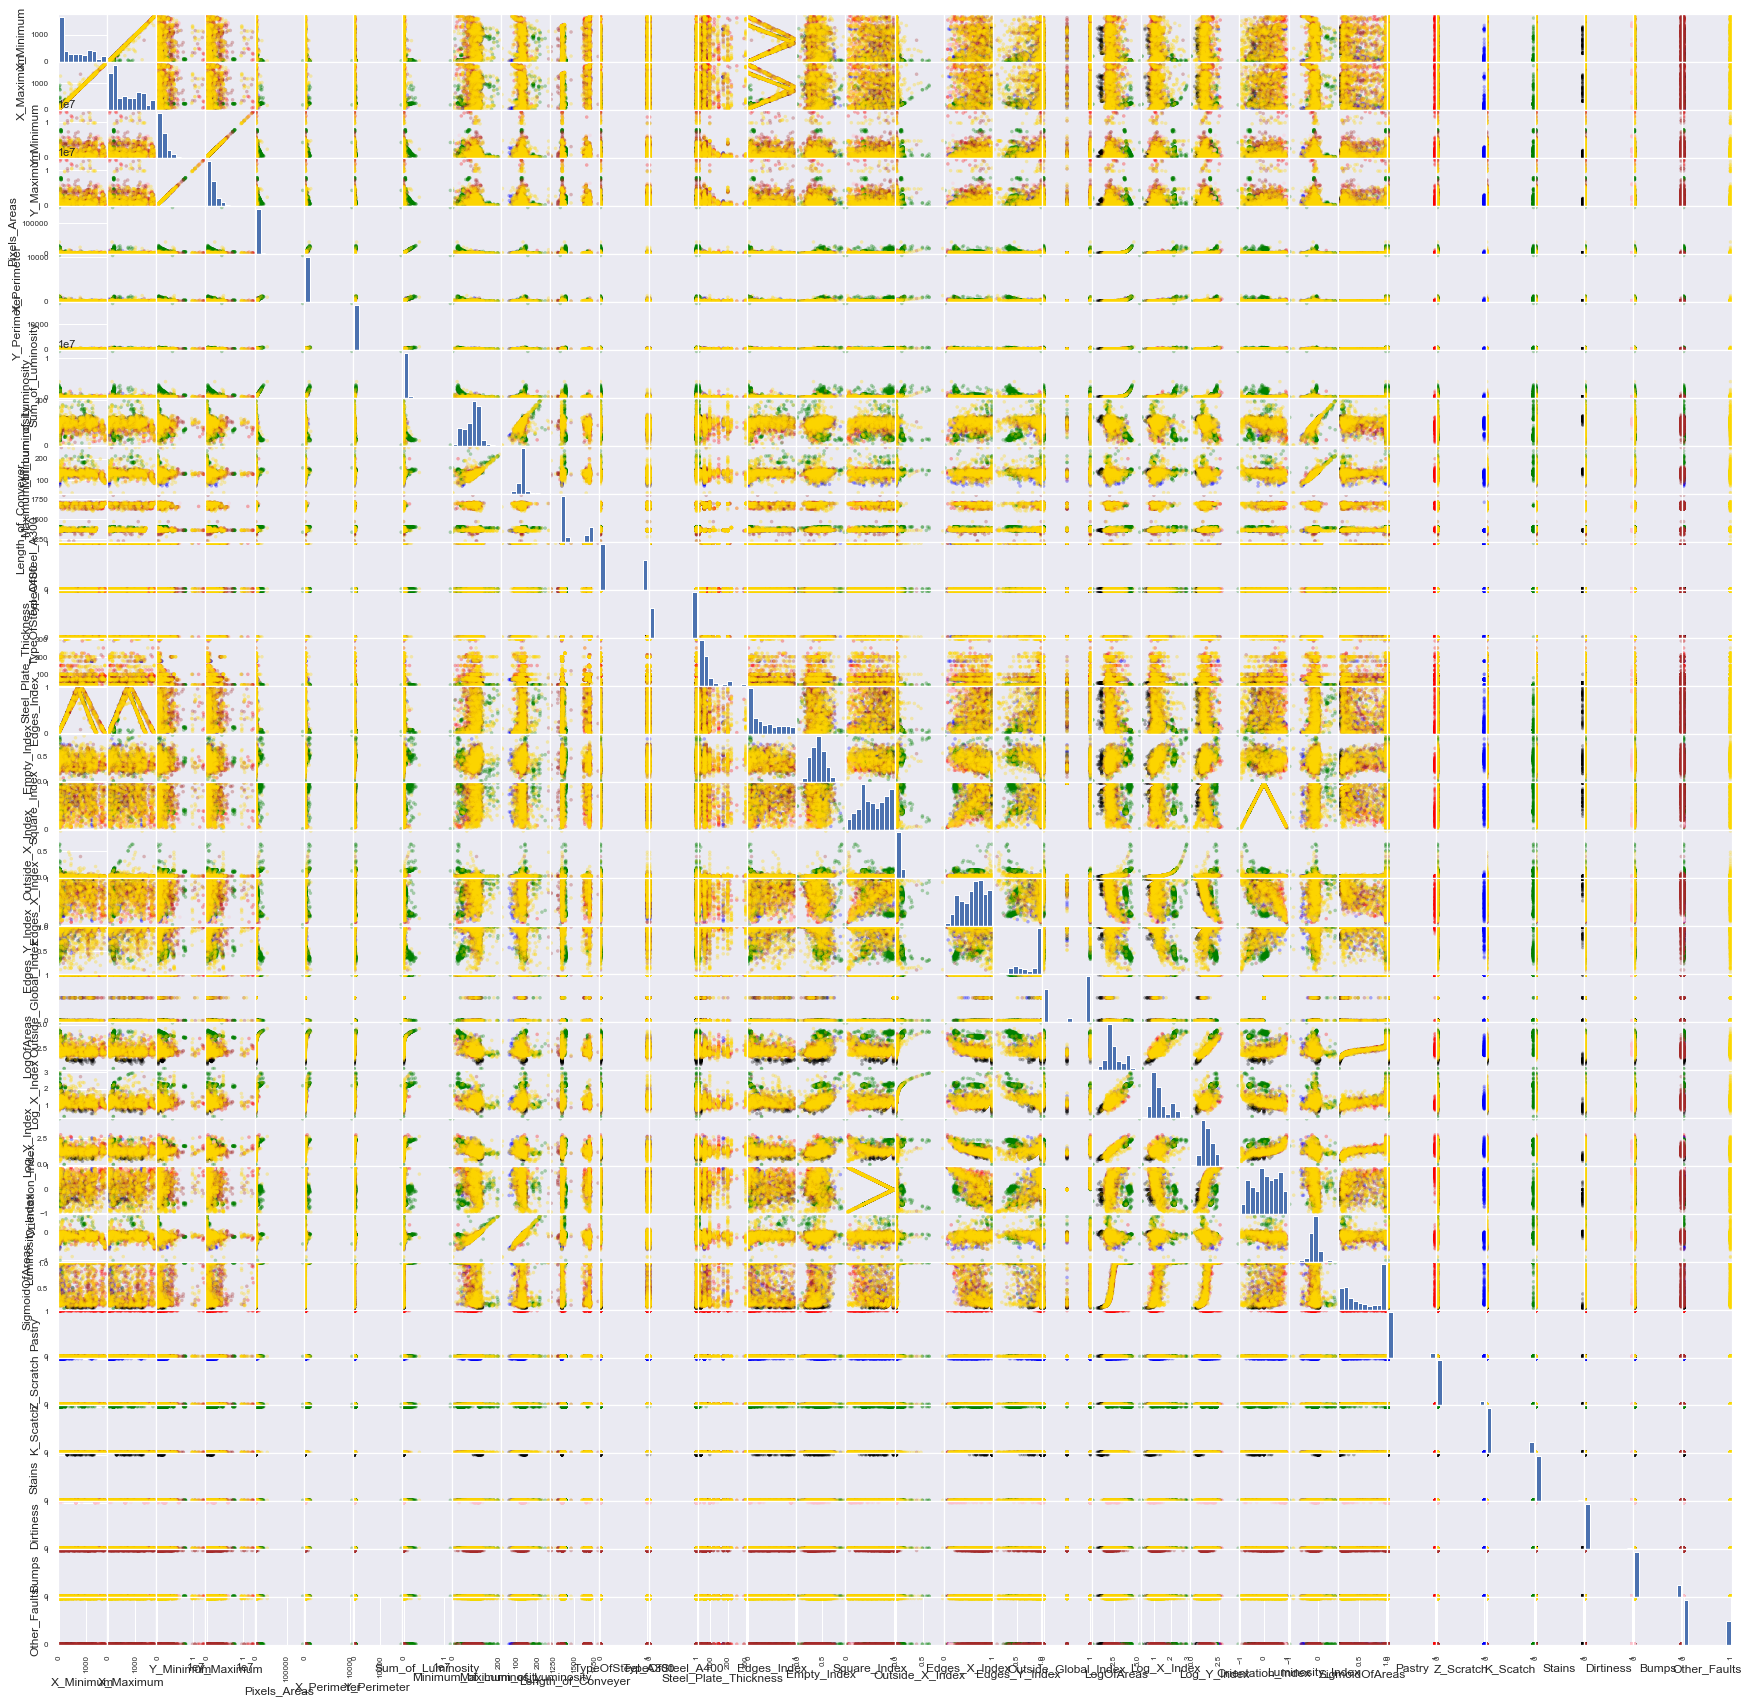

In [20]:
pd.plotting.scatter_matrix(df.loc[:, df.columns!='class'], c=color_list, figsize=[30,30], alpha=0.3, s= 50, diagonal='hist')

#### 위의 범주형 변수 시각화

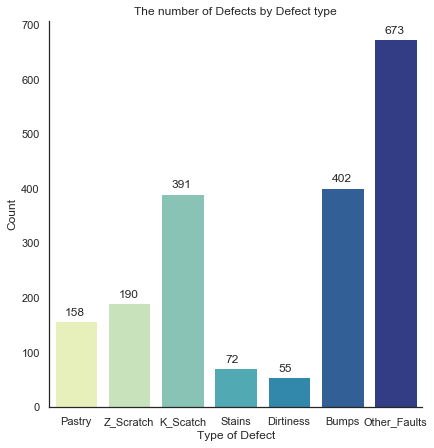

In [23]:
sns.set_style('white')

g = sns.catplot(data=df, x='class', kind='count', palette='YlGnBu', height=6)
g.ax.xaxis.set_label_text('Type of Defect')
g.ax.yaxis.set_label_text('Count')
g.ax.set_title('The number of Defects by Defect type')

for p in g.ax.patches: # ax의 patches(각각의 기둥들= p)
    g.ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+10)) # 높이에 해당하는 값을 annotate할건데 좌표는 x와 y값

#### 상관계수를 통해 각 변수간의 관계 파악 + Heatmap

In [24]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'class'],
      dtype='object', name=0)

In [25]:
df_corTarget = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

corr = df_corTarget.corr()
corr

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,,,,,,,,,,,,,,,,,,,,,,,,,,,
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797


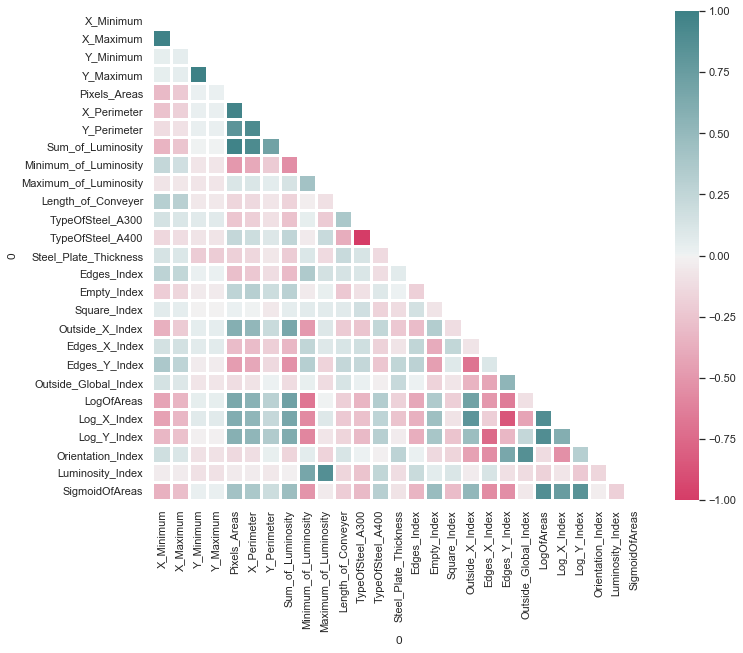

In [26]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 대각 기준 위 값 아래 값 똑같으니 하나만 표현


f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(1,200, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, linewidths=2)

### 학습 및 테스트 데이터 분리

In [27]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

y = df['K_Scatch']

In [28]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)
# stratify : y비율이 train, test에서 비율이 맞게끔

In [29]:
# 표준화 작업 sklearn.preprocessing import StandardScaler 와 같은 역할
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

## 로지스틱 분류 모형 (Grid Search 구축 , Lidge-Lasso penalty /Threshold)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [31]:
lm = LogisticRegression(solver= 'liblinear')

# liblinear로 지정해야 이후 ridge,lasso 모델에도 알고리즘 적용가능
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- 그리드 서치를 통해 최적의 파라미터 탐색

In [34]:
parameters = {'penalty' : ['l1', 'l2'], 'C':[0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'tol': [1e-4, 1e-2, 1, 1e2]}

In [36]:
GSLR = GridSearchCV(lm, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')

In [37]:
GSLR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [38]:
print('final params' , GSLR.best_params_)
print('best score', GSLR.best_score_)

final params {'C': 5, 'penalty': 'l1', 'tol': 0.01}
best score 0.9729321753515301


- 최적 파라미터 경우 범위 극단에 있을 경우 범위 바깥에 있는 것도 시도해 보아야 한다.

### 모형 평가 및 모형 구축

In [41]:
predicted=GSLR.predict(x_test)

cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print('\n Accuracy:', GSLR.score(x_test, y_test))

[[305   6]
 [  5  73]]

 Accuracy: 0.9717223650385605


In [42]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.92      0.94      0.93        78

    accuracy                           0.97       389
   macro avg       0.95      0.96      0.96       389
weighted avg       0.97      0.97      0.97       389



- 파라미터 값 시각화 통해서 파라미터가 바뀔수록 정확도가 어떻게 변화하는가

In [43]:
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GSLR.cv_results_['params']):
    print ('%0.3f (+/-%0.03f) for %r' % (mean, std *2, params))
print()

0.945 (+/-0.037) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
0.946 (+/-0.036) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.942 (+/-0.036) for {'C': 0.01, 'penalty': 'l1', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l1', 'tol': 100.0}
0.950 (+/-0.033) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.950 (+/-0.033) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.954 (+/-0.035) for {'C': 0.01, 'penalty': 'l2', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l2', 'tol': 100.0}
0.964 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
0.963 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.01}
0.954 (+/-0.040) for {'C': 0.1, 'penalty': 'l1', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l1', 'tol': 100.0}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
0.957 (+/-0.032) for {'C': 0.1, 'penalty': 'l2', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l2', 'tol': 100.0}


## 의사결정나무

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [48]:
parameters = {'criterion' : ['gini', 'entropy'],'min_samples_split' : [2, 5, 10, 15], 'max_depth' : [None, 2], 'min_samples_leaf':[1,3,10,15], 'max_features':[None, 'sqrt', 'log2']}

In [50]:
GSDT = GridSearchCV(dt, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GSDT.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [51]:
print('final params', GSDT.best_params_)
print('ACC', GSDT.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
ACC 0.9780976013234077


In [52]:
predicted = GSDT.predict(x_test)
cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print(round(GSDT.score(x_test, y_test), 3))
print(metrics.classification_report(y_test, predicted))

[[308   3]
 [  8  70]]
0.972
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       311
           1       0.96      0.90      0.93        78

    accuracy                           0.97       389
   macro avg       0.97      0.94      0.95       389
weighted avg       0.97      0.97      0.97       389



## 랜덤포레스트

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [57]:
parameters = {'n_estimators':[20,50,100], 'criterion':['entropy'], 'min_samples_split':[2,5], 'max_depth':[None, 2], 'min_samples_leaf':[1, 3, 10], 'max_features':['sqrt']}
GSRF = GridSearchCV(rf, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GSRF.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [58]:
print('final params', GSRF.best_params_)
print('best score', GSRF.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best score 0.9851736972704715


In [59]:
predicted = GSRF.predict(x_test)
cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print(metrics.classification_report(y_test, predicted))

[[311   0]
 [  4  74]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       1.00      0.95      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389



- 랜덤포레스트가 가장 많은 정확도를 가지고 있지만 랜덤포레스트의 경우 모델에 대한 해석이 쉽지 않다. 즉 어떤 요인으로 인해 'K_Scatch'가 가장 많이 발생했는지 그 요인을 명쾌하기 설명해내기 어렵다.

## SVM (서포트 벡터 머신)

In [60]:
from sklearn import svm

svc = svm.SVC()

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [61]:
parameters = {'C':[0.01, 0.1, 0.5, 0.9, 1.5, 10], 'kernel':['linear','rbf','poly'], 'gamma':[0.1, 1, 10]}
GS_SVM = GridSearchCV(svc, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_SVM.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1.5, 10],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [62]:
print('final params', GS_SVM.best_params_)
print('final score', GS_SVM.best_score_)

final params {'C': 1.5, 'gamma': 0.1, 'kernel': 'rbf'}
final score 0.9819602977667493


In [63]:
predicted = GS_SVM.predict(x_test)
cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print(metrics.classification_report(y_test, predicted))

[[311   0]
 [  8  70]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       311
           1       1.00      0.90      0.95        78

    accuracy                           0.98       389
   macro avg       0.99      0.95      0.97       389
weighted avg       0.98      0.98      0.98       389



## 인공 신경망 모형

- 참고 : playground.tensorflow.org/

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
nn_model = MLPClassifier(random_state=1)

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- 인공 신경망의 경우 Hidden Layer 설정하는것이 관건. 
- 방법은 없지만 보편적인 경향성을 말할 수 있음. 보통 1개로도 충분함- 1개에서 시작
- 히든레이어의 노드의 수는 보통 GridSerach를 통해 파악.
- 히든레이어 노드 가이드 라인. Number Of Neurons = Trading Data Samples / Factor * (Input Neurons + Output Neurons) Factor 수를 크게 하면 노드의 수가 줄어들며 적게하면 반대의 경우

In [67]:
x_train.shape

(1552, 27)

In [69]:
a = 1552/(10 * (27+1))  # 27 = Input 변수개수 1 = output y변수
b = 1552 /(1 * (27+1)) # Factor가 1인경우
print(a, b)

5.542857142857143 55.42857142857143


- Hidden Layer 가 하나라고 한다면 Factor 1-10이므로 노드의 수를 5~55개로 설정하며 그리드 서치 실행

In [71]:
parameters = {'alpha':[1e-3, 1e-1, 1e1], 'hidden_layer_sizes':[(5),(30),(56)], 'activation':['tanh', 'relu'], 'solver':['adam', 'lbfgs']}
GS_NN = GridSearchCV(nn_model, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')

# alpha, Searching Space를 찾아야 할 필요가 있다. 범위가 넓으므로

In [72]:
GS_NN.fit(x_train, y_train)

C:\Users\dissi\anaconda31\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'act

In [73]:
print('final params', GS_NN.best_params_)
print('best score', GS_NN.best_score_)

final params {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 56, 'solver': 'adam'}
best score 0.9781058726220018


In [74]:
means = GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, GS_NN.cv_results_['params']):
    print ('%0.3f (+/-%0.03f) for %r' % (mean, std *2, params))
print()

0.971 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.971 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.976 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.978 (+/-0.018) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.976 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 56, 'solver': 'adam'}
0.975 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 56, 'solver': 'lbfgs'}
0.971 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.972 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.975 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.976 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_laye

- solver의 경우 adam 보다는 lbfgs일 경우 정확도가 높다. 
- Hidden Layer를 늘려서 진행할 수도 있다.

- Hidden Layer 구성 어려움- 노드 설정에 있어 가이드 라인 존재. Hidden Layer 일단 하나부터 시작.
- 노드 범위를 옮겨가며 최적의 조건을 찾아가기

In [75]:
predicted = GS_NN.predict(x_test)
cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print(metrics.classification_report(y_test, predicted))

[[307   4]
 [  4  74]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.95      0.95      0.95        78

    accuracy                           0.98       389
   macro avg       0.97      0.97      0.97       389
weighted avg       0.98      0.98      0.98       389



## 부스트 (XGBoost, LightGBM)

#### xgboost

In [76]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [77]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# https://xgboost.readthedocs.io/en/latest/parameter.html
# https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [78]:
parameters = {
    'max_depth' : [5,8],
    'min_child_weight' :[1,5],
    'gamma':[0,1],
    'colsample_bytree': [0.8, 1],
    'colsample_bylevel': [0.9, 1],
    'n_estimators': [50, 100]
}

GS_xgb = GridSearchCV(xgb_model, param_grid = parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_xgb.fit(x_train, y_train)

C:\Users\dissi\anaconda31\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=8,
             param_grid={'cols

In [79]:
print('final params', GS_xgb.best_params_)
print('best score', GS_xgb.best_score_)

final params {'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
best score 0.9864681555004138


In [80]:
predicted = GS_xgb.predict(x_test)
cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print(metrics.classification_report(y_test, predicted))

[[310   1]
 [  4  74]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       0.99      0.95      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389



#### lightgbm

In [81]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(objective='binary')

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
# https://lightgbm.readthedocs.io/en/latest/Parameters_Tuning.html

In [82]:
parameters ={
    'num_leaves' : [32, 64, 128],
    'min_data_in_leaf' : [1, 5, 10],
    'colsample_byree' : [0.8, 1],
    'n_estimators' : [100, 150]
    }

GS_lgbm = GridSearchCV(lgbm_model, parameters, cv=10, n_jobs = n_thread, scoring='accuracy')
GS_lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: colsample_byree
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=8,
             param_grid={'colsample_byree': [0.8, 1],


In [84]:
print('final params', GS_lgbm.best_params_)
print('best score', GS_lgbm.best_score_)

final params {'colsample_byree': 0.8, 'min_data_in_leaf': 10, 'n_estimators': 100, 'num_leaves': 64}
best score 0.985827129859388


In [85]:
predicted = GS_lgbm.predict(x_test)
cMatrix = confusion_matrix(y_test, predicted)
print(cMatrix)
print(metrics.classification_report(y_test, predicted))

[[310   1]
 [  5  73]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       0.99      0.94      0.96        78

    accuracy                           0.98       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.98      0.98      0.98       389

